# Hackathon - Flatiron October Cohort
## Saturday, January 26, 2019
### Andrew Wester & MAGIC MILLY

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from IPython.display import Image
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.externals.six import StringIO
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score, precision_score
from sklearn.metrics import make_scorer, recall_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import warnings
warnings.filterwarnings('ignore')

In [2]:
hidden_vals = ['4472-LVYGI', '3115-CZMZD', '5709-LVOEQ', '4367-NUYAO', '1371-DWPAZ', '7644-OMVMY', 
               '3213-VVOLG', '2520-SGTTA', '2923-ARZLG', '4075-WKNIU', '2775-SEFEE']

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
for val in hidden_vals:
    print(df.loc[df['customerID'] == val].index)

Int64Index([488], dtype='int64')
Int64Index([753], dtype='int64')
Int64Index([936], dtype='int64')
Int64Index([1082], dtype='int64')
Int64Index([1340], dtype='int64')
Int64Index([3331], dtype='int64')
Int64Index([3826], dtype='int64')
Int64Index([4380], dtype='int64')
Int64Index([5218], dtype='int64')
Int64Index([6670], dtype='int64')
Int64Index([6754], dtype='int64')


In [5]:
indexes = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]
for index in indexes:
    df.drop(index=index, inplace=True)

In [6]:
df.TotalCharges.value_counts()

20.2       11
19.75       9
19.9        8
19.65       8
20.05       8
19.55       7
45.3        7
20.25       6
20.15       6
19.45       6
20.3        5
20.45       5
69.65       4
19.85       4
19.3        4
20.5        4
44          4
69.6        4
19.95       4
75.3        4
50.15       4
69.95       4
69.9        4
20.35       4
74.7        4
20.4        4
19.2        4
19.5        4
49.9        4
19.4        4
           ..
3204.4      1
2653.65     1
2210.2      1
1625.65     1
4016.85     1
1980.3      1
871.4       1
3876.2      1
1975.85     1
893         1
2196.15     1
5243.05     1
5611.7      1
781.25      1
834.2       1
6758.45     1
978.6       1
1974.8      1
2595.25     1
1244.5      1
2335.3      1
5071.05     1
7553.6      1
4428.45     1
1269.55     1
273.75      1
5165.7      1
827.45      1
3027.25     1
246.25      1
Name: TotalCharges, Length: 6530, dtype: int64

In [7]:
df.TotalCharges = df.TotalCharges.astype('float')

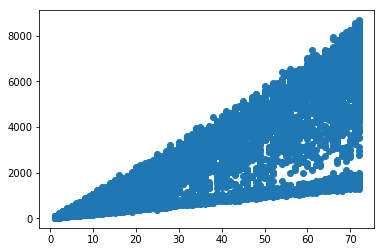

In [8]:
x = df.tenure
y = df.TotalCharges
plt.scatter(x, y);

In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Column information and Values
* customerID can likely be dropped **DROP**
* gender is normal
* SeniorCitizen is binary (0 or 1)
* Partner is Yes or No values
* Dependents is Yes or No values
* tenure is values ranging from 0 to 72
* PhoneService is yes or no values
* MultipleLines is Yes, No, or "No phone service"
* InternetService is Fiber optic, DBL, or No
* OnlineSecurity is No, Yes, or "No internet service"
* OnlineBackup is No, Yes, or "No internet servie"
* DeviceProtection is No, Yes, or "No internet service"
* TechSupport is No, Yes, or "No internet service"
* StreamingTV is No, Yes, or "No internet service"
* StreamingMovies is No, Yes, or "No internet service"
* Contract is Month-to-month, Two year, or One year
* PaperlessBilling is Yes or No
* PaymentMethod is Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)
* MonthlyCharges is from 18.25 to 118.75
* TotalCharges is 
* Churn is a No or Yes value (OUR TARGET)

In [10]:
df.drop(columns=['customerID'], inplace=True)

In [11]:
df.gender = df['gender'].map({'Male':1, 'Female':0})
df.Partner = df['Partner'].map({'Yes':1, 'No':0})
df.Dependents = df['Dependents'].map({'Yes':1, 'No':0})
df.PhoneService = df['PhoneService'].map({'Yes':1, 'No':0})
df.PaperlessBilling = df['PaperlessBilling'].map({'Yes':1, 'No':0})
df.MultipleLines = df['MultipleLines'].map({'Yes':1, 'No':0, 'No phone service': 2})
df.InternetService = df['InternetService'].map({'Fiber optic':2, 'DSL':1, 'No':0})
df.OnlineSecurity = df['OnlineSecurity'].map({'No':0, 'Yes':1, 'No internet service':2})
df.OnlineBackup = df['OnlineBackup'].map({'No':0, 'Yes':1, 'No internet service':2})
df.DeviceProtection = df['DeviceProtection'].map({'No':0, 'Yes':1, 'No internet service':2})
df.TechSupport = df['TechSupport'].map({'No':0, 'Yes':1, 'No internet service':2})
df.StreamingTV = df['StreamingTV'].map({'No':0, 'Yes':1, 'No internet service':2})
df.StreamingMovies = df['StreamingMovies'].map({'No':0, 'Yes':1, 'No internet service':2})
df.Contract = df['Contract'].map({'Month-to-month':0, 'Two year':2, 'One year':1})
df.Churn = df['Churn'].map({'Yes':1, 'No':0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
gender              7032 non-null int64
SeniorCitizen       7032 non-null int64
Partner             7032 non-null int64
Dependents          7032 non-null int64
tenure              7032 non-null int64
PhoneService        7032 non-null int64
MultipleLines       7032 non-null int64
InternetService     7032 non-null int64
OnlineSecurity      7032 non-null int64
OnlineBackup        7032 non-null int64
DeviceProtection    7032 non-null int64
TechSupport         7032 non-null int64
StreamingTV         7032 non-null int64
StreamingMovies     7032 non-null int64
Contract            7032 non-null int64
PaperlessBilling    7032 non-null int64
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null int64
dtypes: float64(2), int64(17), object(1)
memory usage: 1.1+ MB


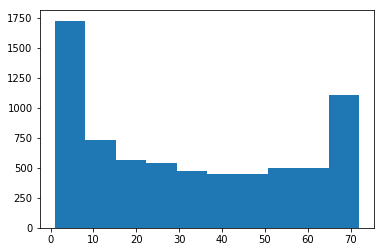

In [12]:
plt.hist(df.tenure);

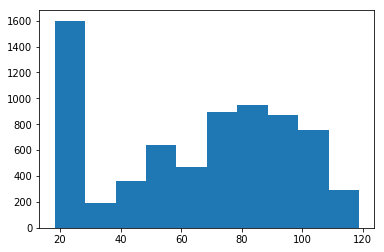

In [13]:
plt.hist(df.MonthlyCharges);

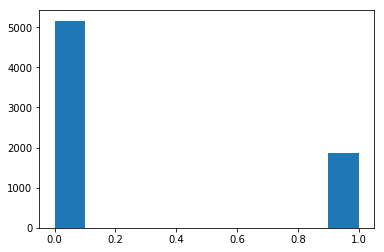

In [14]:
plt.hist(df.Churn);

<Figure size 504x504 with 0 Axes>

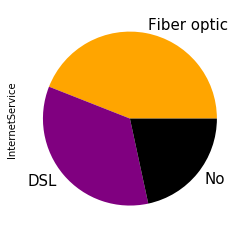

<Figure size 504x504 with 0 Axes>

In [15]:
(df['InternetService'].value_counts()*100.0 /len(df)).plot(kind='pie', labels = ['Fiber optic', 'DSL', 'No'],  colors = ['orange','purple', 'black'], fontsize = 15)
plt.figure(figsize = (7,7))

In [16]:
df = pd.get_dummies(df)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,2,1,0,1,...,0,0,1,29.85,29.85,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,0,1,0,56.95,1889.50,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,0,0,1,53.85,108.15,1,0,0,0,1
3,1,0,0,0,45,0,2,1,1,0,...,0,1,0,42.30,1840.75,0,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,...,0,0,1,70.70,151.65,1,0,0,1,0


In [17]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
gender                                     7032 non-null int64
SeniorCitizen                              7032 non-null int64
Partner                                    7032 non-null int64
Dependents                                 7032 non-null int64
tenure                                     7032 non-null int64
PhoneService                               7032 non-null int64
MultipleLines                              7032 non-null int64
InternetService                            7032 non-null int64
OnlineSecurity                             7032 non-null int64
OnlineBackup                               7032 non-null int64
DeviceProtection                           7032 non-null int64
TechSupport                                7032 non-null int64
StreamingTV                                7032 non-null int64
StreamingMovies                            7032 non-null int64
Contract   

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,2,1,0,1,...,0,0,1,29.85,29.85,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,0,1,0,56.95,1889.50,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,0,0,1,53.85,108.15,1,0,0,0,1
3,1,0,0,0,45,0,2,1,1,0,...,0,1,0,42.30,1840.75,0,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,...,0,0,1,70.70,151.65,1,0,0,1,0


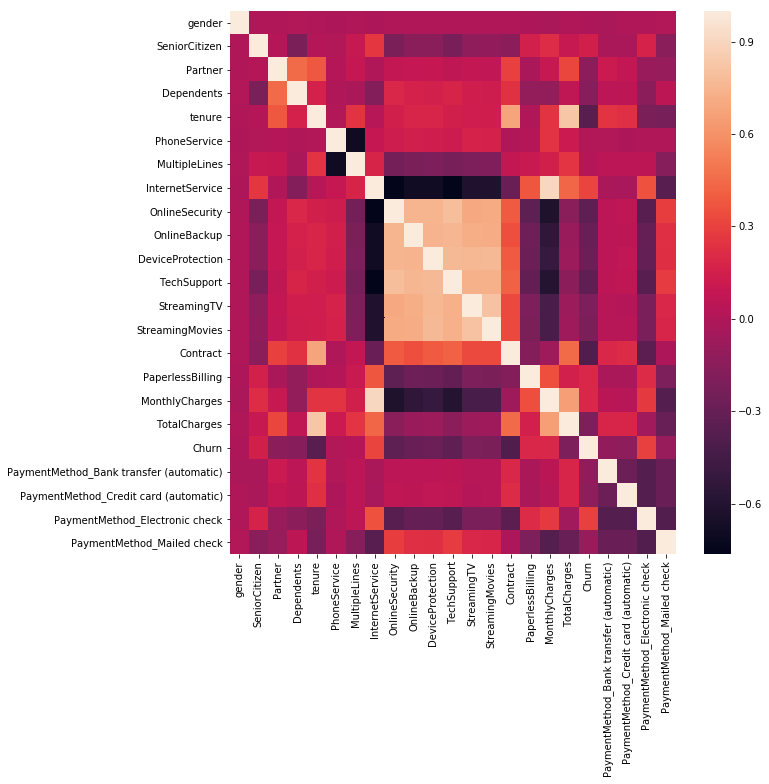

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [19]:
# monthly charges v internet service
# tenure v total charges
#

In [20]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df))
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,2.111355,-0.287852,-0.902520,0.286376,...,-1.078089,-0.826735,0.828939,-1.161694,-0.994194,-0.601663,-0.529976,-0.525351,1.404764,-0.543604
1,0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.938260,-0.287852,0.352974,-0.998752,...,-1.078089,0.373926,-1.206361,-0.260878,-0.173740,-0.601663,-0.529976,-0.525351,-0.711863,1.839576
2,0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.938260,-0.287852,0.352974,0.286376,...,-1.078089,-0.826735,0.828939,-0.363923,-0.959649,1.662059,-0.529976,-0.525351,-0.711863,1.839576
3,0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,2.111355,-0.287852,0.352974,-0.998752,...,-1.078089,0.373926,-1.206361,-0.747850,-0.195248,-0.601663,1.886879,-0.525351,-0.711863,-0.543604
4,-1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.938260,0.996525,-0.902520,-0.998752,...,-1.078089,-0.826735,0.828939,0.196178,-0.940457,1.662059,-0.529976,-0.525351,1.404764,-0.543604


In [21]:
features = df.drop(columns='Churn')
target = df.Churn
print(features.shape, target.shape)

(7032, 22) (7032,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5274, 22), (1758, 22), (5274,), (1758,))

In [23]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1074,  230],
       [ 265,  189]])

In [25]:
train_pred = dt.predict(X_train)
confusion_matrix(y_train, train_pred)

array([[3859,    0],
       [  12, 1403]])

In [26]:
f1_score(y_test, y_pred)

0.43298969072164956

In [27]:
accuracy_score(y_test, y_pred)

0.7184300341296929

In [28]:
recall_score(y_test, y_pred)

0.41629955947136565

In [29]:
precision_score(y_test, y_pred)

0.4510739856801909

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1304
           1       0.45      0.42      0.43       454

   micro avg       0.72      0.72      0.72      1758
   macro avg       0.63      0.62      0.62      1758
weighted avg       0.71      0.72      0.71      1758



In [31]:
def plot_feature_importances(model, figsize=(12,12)):
    
    """Visualize feature importance of selected model as determined by feature_importances_ method."""
    
    n_features = X_train.shape[1]
    plt.figure(figsize=figsize)
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")

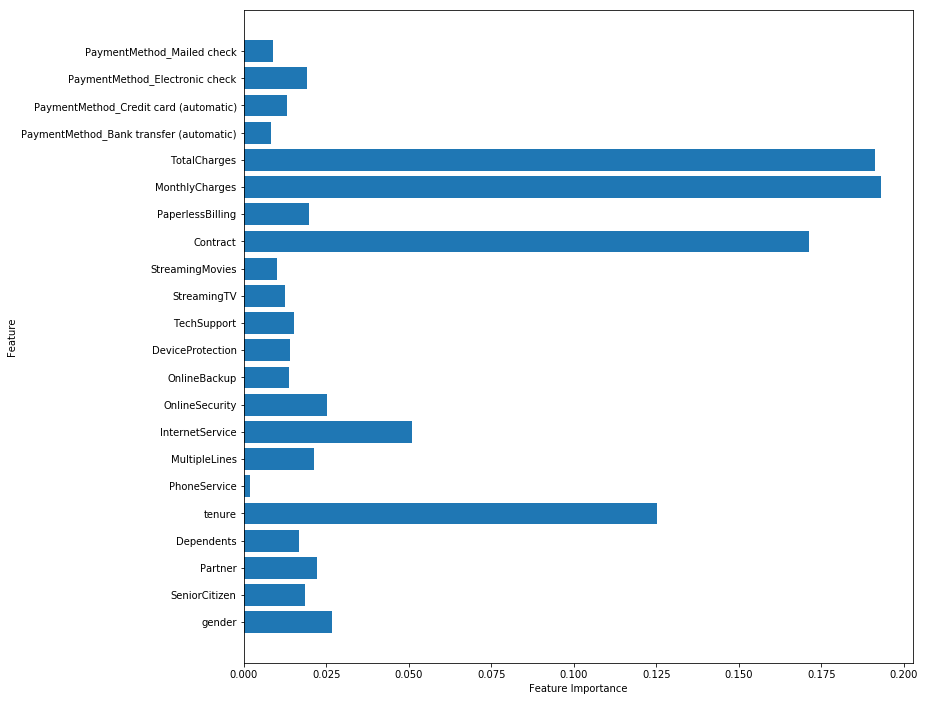

In [32]:
plot_feature_importances(dt)

In [33]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
y_pred_rf = rf.predict(X_test)
confusion_matrix(y_test, y_pred_rf)

array([[1170,  134],
       [ 255,  199]])

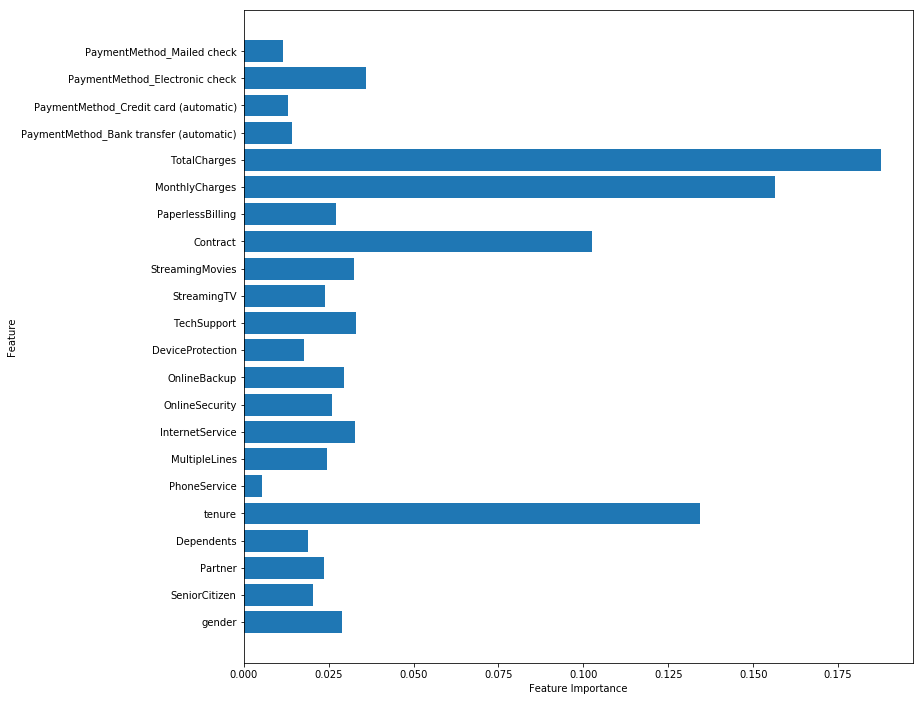

In [35]:
plot_feature_importances(rf)

In [36]:
accuracy_score(y_test, y_pred_rf)

0.7787258248009101

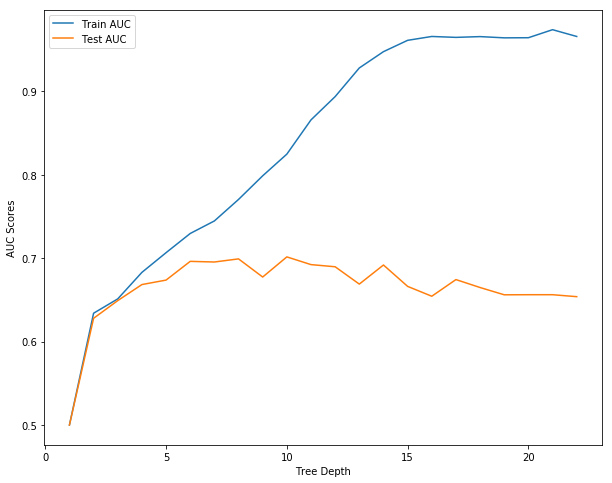

In [37]:
# Visualize effect of different max_depths on AUC scores

max_depths = np.linspace(1,22,22,endpoint=True)
train_auc = []
test_auc = []

for depth in max_depths:
    
    clf = RandomForestClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    train_pred = clf.predict(X_train)
    fpr, tpr, thresh = roc_curve(y_train, train_pred)
    roc_auc = auc(fpr, tpr)
    train_auc.append(roc_auc)
    
    test_pred = clf.predict(X_test)
    fpr, tpr, thresh = roc_curve(y_test, test_pred)
    roc_auc = auc(fpr, tpr)
    test_auc.append(roc_auc)

plt.figure(figsize=(10,8))
plt.plot(max_depths, train_auc, label='Train AUC')
plt.plot(max_depths, test_auc, label='Test AUC')
plt.xlabel('Tree Depth')
plt.ylabel('AUC Scores')
plt.legend(loc='best')
plt.show();

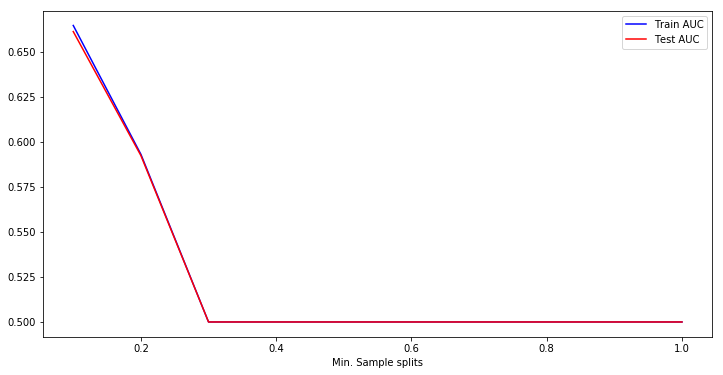

In [38]:
# Identify the optimal tree depth for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = RandomForestClassifier(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

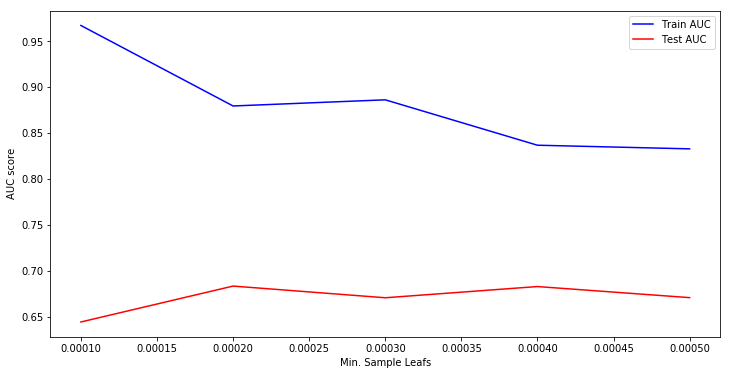

In [39]:
min_samples_leafs = np.linspace(0.0001, 0.0005, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    

plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()    

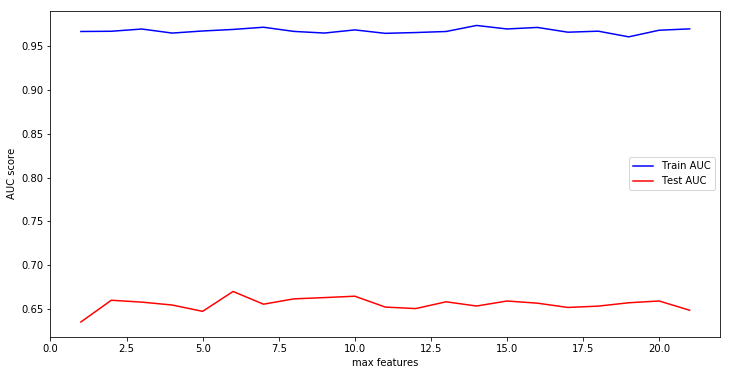

In [40]:
# Find the best value for optimal maximum feature size
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = RandomForestClassifier(max_features=max_feature)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

    
plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')

plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()    

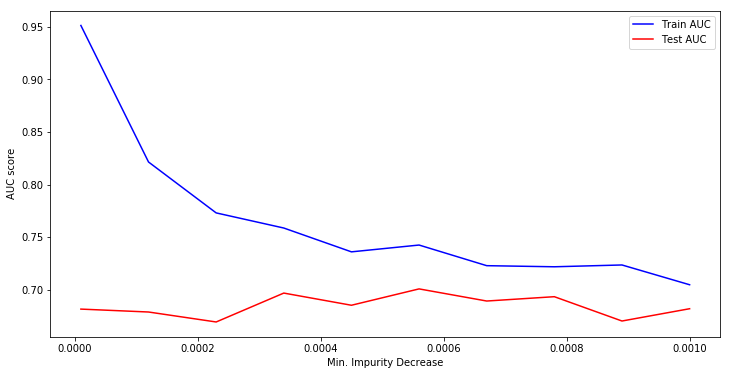

In [41]:
min_impurity_decreases = np.linspace(0.00001, 0.001, 10, endpoint=True)
train_results = []
test_results = []
for min_impurity_decrease in min_impurity_decreases:
    dt = RandomForestClassifier(min_impurity_decrease=min_impurity_decrease)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    

plt.figure(figsize=(12,6))    
plt.plot(min_impurity_decreases, train_results, 'b', label='Train AUC')
plt.plot(min_impurity_decreases, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Impurity Decrease')
plt.legend()
plt.show()    

In [42]:
# train a classifier with optimal values identified above
dt = RandomForestClassifier(max_depth=7,
                           min_samples_split=0.2,
                           min_samples_leaf=0.0002,
                           min_impurity_decrease=0.0005)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.599819937298992

In [43]:
accuracy_score(y_test, y_pred)

0.7758816837315131

In [44]:
recall_score(y_test, y_pred)

0.2356828193832599

[[1257   47]
 [ 347  107]]


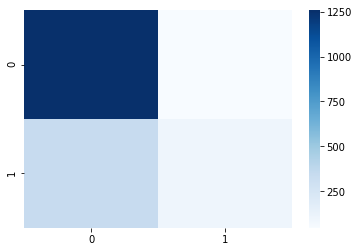

In [45]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Blues')

In [46]:
dt = DecisionTreeClassifier(random_state=25, class_weight='balanced')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best')

In [47]:
dt_train_preds = dt.predict(X_train)
dt_test_preds = dt.predict(X_test)

In [48]:
def print_metrics(y_train, y_test, y_train_preds, y_test_preds):
    print('Train Set Classification Report')
    print(classification_report(y_train, y_train_preds))
    print('*'*50)
    print('Test Set Classification Report')
    print(classification_report(y_test, y_test_preds))
    print('*'*50)
    print('Train Set Confusion Matrix')
    print(confusion_matrix(y_train, y_train_preds))
    print('*'*50)
    print('Test Set Confusion Matrix')
    print(confusion_matrix(y_test, y_test_preds))
    print('*'*50)
    print('Train Set Accuracy Score')
    print(accuracy_score(y_train, y_train_preds))
    print('*'*50)
    print('Test Set Accuracy Score')
    print(accuracy_score(y_test, y_test_preds))

In [49]:
print_metrics(y_train, y_test, dt_train_preds, dt_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3859
           1       0.99      1.00      1.00      1415

   micro avg       1.00      1.00      1.00      5274
   macro avg       1.00      1.00      1.00      5274
weighted avg       1.00      1.00      1.00      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1304
           1       0.48      0.46      0.47       454

   micro avg       0.73      0.73      0.73      1758
   macro avg       0.65      0.64      0.64      1758
weighted avg       0.73      0.73      0.73      1758

**************************************************
Train Set Confusion Matrix
[[3846   13]
 [   0 1415]]
**************************************************
Test Set Confusion Matrix
[[1076  228]
 [ 246  208]]
***********************

In [50]:
rf = RandomForestClassifier(random_state=25, class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False, random_state=25,
            verbose=0, warm_start=False)

In [51]:
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)

In [52]:
print_metrics(y_train, y_test, rf_train_preds, rf_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3859
           1       0.99      0.94      0.96      1415

   micro avg       0.98      0.98      0.98      5274
   macro avg       0.98      0.97      0.97      5274
weighted avg       0.98      0.98      0.98      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1304
           1       0.56      0.40      0.47       454

   micro avg       0.76      0.76      0.76      1758
   macro avg       0.68      0.65      0.66      1758
weighted avg       0.75      0.76      0.75      1758

**************************************************
Train Set Confusion Matrix
[[3847   12]
 [  90 1325]]
**************************************************
Test Set Confusion Matrix
[[1160  144]
 [ 272  182]]
***********************

In [53]:
def custom_predict(clf, X_test, thresh=0.35):
    y_preds = clf.predict_proba(X_test)
    classes = []
    for pred in y_preds:
        if pred[1] >= thresh:
            classes.append(1)
        else:
            classes.append(0)
    return np.array(classes)

In [54]:
rf_custom_y_preds = custom_predict(rf, X_test)

In [55]:
print_metrics(y_train, y_test, rf_train_preds, rf_custom_y_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3859
           1       0.99      0.94      0.96      1415

   micro avg       0.98      0.98      0.98      5274
   macro avg       0.98      0.97      0.97      5274
weighted avg       0.98      0.98      0.98      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.85      0.78      0.82      1304
           1       0.49      0.61      0.55       454

   micro avg       0.74      0.74      0.74      1758
   macro avg       0.67      0.70      0.68      1758
weighted avg       0.76      0.74      0.75      1758

**************************************************
Train Set Confusion Matrix
[[3847   12]
 [  90 1325]]
**************************************************
Test Set Confusion Matrix
[[1019  285]
 [ 177  277]]
***********************

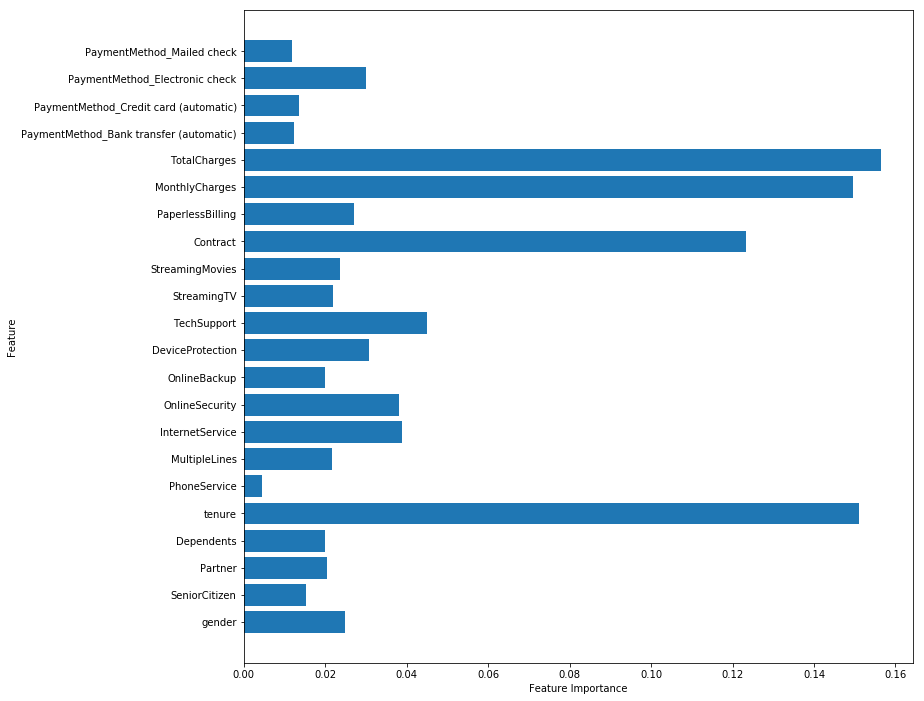

In [56]:
plot_feature_importances(rf)

In [57]:
rf_param_grid = {
    'n_estimators': [5, 10, 15, 20, 35, 50],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [0.1, 0.2, 0.3, 0.4, 0.5],
    'min_samples_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'min_impurity_decrease': [0, 0.1, 0.001, 0.0001, 0.00001]
}

num_perm = 6 * 2 * 4 * 5 * 5 * 3 * 5
print(f'GridSearch will search through {num_perm} different permutations.')

GridSearch will search through 18000 different permutations.


In [58]:
import time
# start_time = time.time()

# rf_grid_search = GridSearchCV(rf, rf_param_grid, scoring='recall', cv=3)
# rf_grid_search.fit(scaled_df, y)

# print(f'Best Score: {rf_grid_search.best_score_ * 100}%')
# print(f'Total Runtime: {time.time() - start_time} seconds')
# print('')
# print(f'Optimal Parameters: {rf_grid_search.best_params_}')

Best Score: 91.22525414660247%
Total Runtime: 2019.1292400360107 seconds

Optimal Parameters: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 0.3, 'min_samples_split': 0.1, 'n_estimators': 5}

#### Results of Random Forest GridSearch
- class_weight: balanced_subsample
- criterion: entropy
- max_depth: None (Default)
- min_impurity_decrease: 0.1
- min_samples_leaf: 0.3
- min_samples_split: 0.1
- n_estimators: 5

In [59]:
# start_time = time.time()

# rf_grid_search = GridSearchCV(rf, rf_param_grid, scoring=make_scorer(f1_score), cv=3, verbose=True)
# rf_grid_search.fit(features, target)

# print(f'Best Score: {rf_grid_search.best_score_ * 100}%')
# print(f'Total Runtime: {time.time() - start_time} seconds')
# print('')
# print(f'Optimal Parameters: {rf_grid_search.best_params_}')

Fitting 3 folds for each of 18000 candidates, totalling 54000 fits

Best Score: 61.65604928102627%

Total Runtime: 2799.2034039497375 seconds

Optimal Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 35}

In [60]:
f1_optimized_rf = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=None, 
                                         min_impurity_decrease=0.001, min_samples_leaf=0.1, min_samples_split=0.1,
                                         n_estimators=35)
f1_optimized_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.001,
            min_impurity_split=None, min_samples_leaf=0.1,
            min_samples_split=0.1, min_weight_fraction_leaf=0.0,
            n_estimators=35, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [61]:
f1_op_rf_train_preds = f1_optimized_rf.predict(X_train)
f1_op_rf_test_preds = f1_optimized_rf.predict(X_test)

In [62]:
print_metrics(y_train, y_test, f1_op_rf_train_preds, f1_op_rf_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      3859
           1       0.50      0.82      0.62      1415

   micro avg       0.73      0.73      0.73      5274
   macro avg       0.71      0.76      0.71      5274
weighted avg       0.80      0.73      0.74      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1304
           1       0.47      0.81      0.59       454

   micro avg       0.71      0.71      0.71      1758
   macro avg       0.69      0.74      0.69      1758
weighted avg       0.80      0.71      0.73      1758

**************************************************
Train Set Confusion Matrix
[[2693 1166]
 [ 257 1158]]
**************************************************
Test Set Confusion Matrix
[[890 414]
 [ 88 366]]
***************************

In [63]:
print(f'Overall Test Recall Score: {recall_score(y_test, f1_op_rf_test_preds)}')

Overall Test Recall Score: 0.8061674008810573


In [64]:
print(f'Overall Test F1 Score: {f1_score(y_test, f1_op_rf_test_preds)}')

Overall Test F1 Score: 0.5931928687196111


In [65]:
optimized_rf = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy', random_state=25, \
                                     min_impurity_decrease=0.1, min_samples_leaf=0.3, min_samples_split=0.1, \
                                     n_estimators=5)
optimized_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.1,
            min_impurity_split=None, min_samples_leaf=0.3,
            min_samples_split=0.1, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=None, oob_score=False, random_state=25,
            verbose=0, warm_start=False)

In [66]:
op_rf_train_preds = optimized_rf.predict(X_train)
op_rf_test_preds = optimized_rf.predict(X_test)

In [67]:
print_metrics(y_train, y_test, op_rf_train_preds, op_rf_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.89      0.61      0.72      3859
           1       0.42      0.79      0.55      1415

   micro avg       0.66      0.66      0.66      5274
   macro avg       0.65      0.70      0.64      5274
weighted avg       0.76      0.66      0.68      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.88      0.60      0.71      1304
           1       0.40      0.77      0.53       454

   micro avg       0.64      0.64      0.64      1758
   macro avg       0.64      0.68      0.62      1758
weighted avg       0.76      0.64      0.66      1758

**************************************************
Train Set Confusion Matrix
[[2346 1513]
 [ 303 1112]]
**************************************************
Test Set Confusion Matrix
[[781 523]
 [105 349]]
***************************

In [68]:
print(f'Overall Test Recall Score: {recall_score(y_test, op_rf_test_preds)}')

Overall Test Recall Score: 0.7687224669603524


In [69]:
print(f'Overall Test F1 Score: {f1_score(y_test, op_rf_test_preds)}')

Overall Test F1 Score: 0.526395173453997


### Decision Tree Grid Search

In [70]:
dt = DecisionTreeClassifier(random_state=25)

In [71]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [0.1, 0.3, 0.5],
    'min_samples_leaf': [0.1, 0.3, 0.5],
    'class_weight': [None, 'balanced'],
    'min_impurity_decrease': [0, 0.1, 0.001]
}

num_perm = 2 * 3 * 3 * 3 * 2 * 3
print(f'GridSearch will search through {num_perm} different permutations.')

GridSearch will search through 324 different permutations.


In [72]:
# start_time = time.time()

# dt_grid_search = GridSearchCV(dt, dt_param_grid, scoring='recall', cv=3)
# dt_grid_search.fit(scaled_df, y)

# print(f'Best Score: {dt_grid_search.best_score_ * 100}%')
# print(f'Total Runtime: {time.time() - start_time} seconds')
# print('')
# print(f'Optimal Parameters: {dt_grid_search.best_params_}')

Best Score: 88.55002675227394%
Total Runtime: 6.125700950622559 seconds

Optimal Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_impurity_decrease': 0, 'min_samples_leaf': 0.1, 'min_samples_split': 0.3}

#### Results of Decision Tree GridSearch
- class_weight: balanced
- criterion: gini (Default)
- max_depth: None (Default)
- min_impurity_decrease: 0 (Default)
- min_samples_leaf: 0.1
- min_samples_split: 0.3

In [73]:
start_time = time.time()

dt_grid_search = GridSearchCV(dt, dt_param_grid, scoring=make_scorer(f1_score), cv=3)
dt_grid_search.fit(features, target)

print(f'Best Score: {dt_grid_search.best_score_ * 100}%')
print(f'Total Runtime: {time.time() - start_time} seconds')
print('')
print(f'Optimal Parameters: {dt_grid_search.best_params_}')

Best Score: 62.10515335124951%
Total Runtime: 7.6718010902404785 seconds

Optimal Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_impurity_decrease': 0, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}


In [74]:
optimized_dt = DecisionTreeClassifier(class_weight='balanced', random_state=25, min_samples_leaf=0.1, min_samples_split=0.3)
optimized_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.1, min_samples_split=0.3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best')

In [75]:
op_dt_train_preds = optimized_dt.predict(X_train)
op_dt_test_preds = optimized_dt.predict(X_test)

In [76]:
print_metrics(y_train, y_test, op_dt_train_preds, op_dt_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.93      0.58      0.71      3859
           1       0.43      0.88      0.58      1415

   micro avg       0.66      0.66      0.66      5274
   macro avg       0.68      0.73      0.65      5274
weighted avg       0.80      0.66      0.68      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.94      0.55      0.70      1304
           1       0.41      0.89      0.56       454

   micro avg       0.64      0.64      0.64      1758
   macro avg       0.67      0.72      0.63      1758
weighted avg       0.80      0.64      0.66      1758

**************************************************
Train Set Confusion Matrix
[[2221 1638]
 [ 164 1251]]
**************************************************
Test Set Confusion Matrix
[[722 582]
 [ 50 404]]
***************************

In [77]:
print(f'Overall Test Recall Score: {recall_score(y_test, op_dt_test_preds)}')

Overall Test Recall Score: 0.8898678414096917


### This tells us that of the clients we believe will stay, 89% will stay, only 11% will leave

In [93]:
print(f'Overall Test Precision Score: {precision_score(y_test, op_dt_test_preds)}')

Overall Test Precision Score: 0.40973630831643004


### This tells us that of the clients we believe will leave, 41% will leave, 59% will stay

In [78]:
print(f'Overall Test F1 Score: {f1_score(y_test, op_dt_test_preds)}')

Overall Test F1 Score: 0.5611111111111111


#### Vanilla AdaBoost

In [79]:
ada = AdaBoostClassifier(random_state=25)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=25)

In [80]:
ada_train_preds = ada.predict(X_train)
ada_test_preds = ada.predict(X_test)

In [81]:
print_metrics(y_train, y_test, ada_train_preds, ada_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      3859
           1       0.68      0.56      0.62      1415

   micro avg       0.81      0.81      0.81      5274
   macro avg       0.77      0.73      0.75      5274
weighted avg       0.80      0.81      0.81      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1304
           1       0.65      0.52      0.58       454

   micro avg       0.80      0.80      0.80      1758
   macro avg       0.75      0.71      0.73      1758
weighted avg       0.79      0.80      0.80      1758

**************************************************
Train Set Confusion Matrix
[[3492  367]
 [ 620  795]]
**************************************************
Test Set Confusion Matrix
[[1175  129]
 [ 216  238]]
***********************

In [82]:
print(f'Overall Test F1 Score: {f1_score(y_test, ada_test_preds)}')

Overall Test F1 Score: 0.5797807551766139


#### AdaBoost GridSearch

In [83]:
ada_param_grid = {
    'algorithm': ['SAMME', 'SAMME.R'],
    'n_estimators': [25, 50, 75],
    'learning_rate': [0.1, 0.3, 0.5, 1, 1.5],
}

num_perm = 2 * 3 * 5
print(f'GridSearch will search through {num_perm} permutations')

GridSearch will search through 30 permutations


In [84]:
# start_time = time.time()

# ada_grid_search = GridSearchCV(ada, ada_param_grid, scoring='recall', cv=3)
# ada_grid_search.fit(scaled_df, y)

# print(f'Best Score: {ada_grid_search.best_score_ * 100}%')
# print(f'Total Runtime: {time.time() - start_time} seconds')
# print('')
# print(f'Optimal Parameters: {ada_grid_search.best_params_}')

Best Score: 57.73140716960942%
Total Runtime: 12.828197002410889 seconds

Optimal Parameters: {'algorithm': 'SAMME', 'learning_rate': 1.5, 'n_estimators': 25}

#### Results of AdaBoost GridSearch
- algorithm: SAMME
- learning_rate: 1.5
- n_estimators: 25

In [85]:
optimized_ada = AdaBoostClassifier(algorithm='SAMME', learning_rate=1.5, n_estimators=25, random_state=25)
optimized_ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.5,
          n_estimators=25, random_state=25)

In [86]:
op_ada_train_preds = optimized_ada.predict(X_train)
op_ada_test_preds = optimized_ada.predict(X_test)

In [87]:
print_metrics(y_train, y_test, op_ada_train_preds, op_ada_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3859
           1       0.67      0.55      0.60      1415

   micro avg       0.81      0.81      0.81      5274
   macro avg       0.76      0.73      0.74      5274
weighted avg       0.80      0.81      0.80      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1304
           1       0.60      0.49      0.54       454

   micro avg       0.78      0.78      0.78      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.77      0.78      0.78      1758

**************************************************
Train Set Confusion Matrix
[[3469  390]
 [ 635  780]]
**************************************************
Test Set Confusion Matrix
[[1155  149]
 [ 232  222]]
***********************

In [88]:
print(f'Overall Test Recall Score: {recall_score(y_test, op_ada_test_preds)}')

Overall Test Recall Score: 0.4889867841409692


In [89]:
print(f'Overall Test F1 Score: {f1_score(y_test, op_ada_test_preds)}')

Overall Test F1 Score: 0.5381818181818182


### Stuff that Didn't Work

In [90]:
op_rf_custom_train_preds = custom_predict(optimized_rf, X_train)
op_rf_custom_test_preds = custom_predict(optimized_rf, X_test)

In [91]:
print_metrics(y_train, y_test, op_rf_custom_train_preds, op_rf_custom_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3859
           1       0.27      1.00      0.42      1415

   micro avg       0.27      0.27      0.27      5274
   macro avg       0.13      0.50      0.21      5274
weighted avg       0.07      0.27      0.11      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1304
           1       0.26      1.00      0.41       454

   micro avg       0.26      0.26      0.26      1758
   macro avg       0.13      0.50      0.21      1758
weighted avg       0.07      0.26      0.11      1758

**************************************************
Train Set Confusion Matrix
[[   0 3859]
 [   0 1415]]
**************************************************
Test Set Confusion Matrix
[[   0 1304]
 [   0  454]]
***********************